### Zdefiniowanie funkcji potrzebnych do stworzenia sieci

In [70]:
import numpy as np

##### Zadanie 1

Zaimplementuj funkcję "loss_function" aby obliczała funkcję straty zdefiniowaną poniżej (d = y_real, z = y_pred) i zwracała jej wartość.

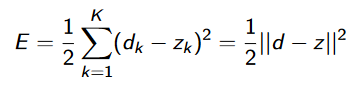

In [71]:
def loss_function(y_real, y_pred):
    E = 0.5 * np.power(np.linalg.norm(y_real - y_pred), 2)
    E = np.round(E, 5)
    return E

In [72]:
print(loss_function(np.array([5, 4, 1, -2, 2]), np.array([4, 2, 1, 0, 3])))

5.0


In [73]:
print(5 == np.array([0.5, 2.0, 0.0, 2.0, 0.5]))

[False False False False False]


In [74]:
# test
assert (5 == loss_function(np.array([5,4,1,-2,2]), np.array([4,2,1,0,3])))

##### Zadanie 2

Zaimplementuj funkcję "sigmoid" aby obliczała i zwracała wartość funkcji sigmoidalnej dla podanego "net".

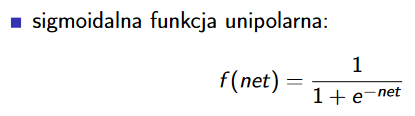

In [75]:
def sigmoid(net):
  return 1 / (1 + np.exp(-net))

In [76]:
# test
net_mock = np.array([3, 0, -1])
assert(np.allclose(np.array([0.95257413, 0.5, 0.26894142]), sigmoid(net_mock)))

##### Zadanie 3

Mając wektor wejściowy "x" o wymiarze j oraz macierz wag "W" o wymiarach k x j (gdzie k to liczba neuronów w warstwie), zaimplementuj funkcję "predict" obliczającą i zwracającą aktywację warstwy neuronów. Użyj zdefiniowanej wcześniej funkcji "sigmoid" jako funkcji aktywacji.

In [77]:
def predict(x, W):
    net = np.dot(W, x)
    activation = sigmoid(net)
    return activation

In [78]:
# test
x_mock = np.array([1, 2, 3])
W_mock = np.array([
    [4, 1, -1],
    [-1, -4, 3],
    [0, 1, -1]
])
assert(np.allclose(np.array([0.95257413, 0.5, 0.26894142]), predict(x_mock, W_mock)))

##### Zadanie 4

Bazując na informacjach ze slajdu poniżej (d = y_real, z = y_pred, y = x), zaimplementuj funkcję która aktualizuje i zwraca wagi.

Zwróć uwagę na wymiary poszczególnych elementów równań, funkcja musi zwracać macierz o tych samych wymiarach co "w_old", czyli k x j, gdzie k to wymiar wektorów "y", a j to wymiar wektora "x".

Przydatne może być użycie metody "reshape" wołanej na obiektach np.array.

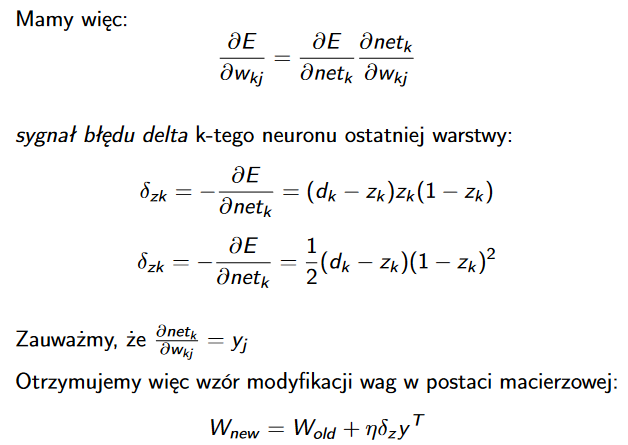

In [79]:
def adjust_weights(w_old, y_real, y_pred, x, alpha):
    delta_z = (y_real - y_pred) * y_pred * (1 - y_pred)
    delta_z = delta_z.reshape((-1, 1))
    x = x.reshape((1, -1))
    w_new = w_old + alpha * np.dot(delta_z, x)
    return w_new

In [80]:
# test
w_old_mock = np.array([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
])
y_real_mock = np.array([1,0,0])
y_pred_mock = np.array([0.5, 0.5, 0.5])
x_mock = np.array([2, 2, 2, 2])
w_new_expected = np.array([
    [2,2,2,2],
    [1,1,1,1],
    [2,2,2,2]
])
assert((w_new_expected == adjust_weights(w_old_mock, y_real_mock, y_pred_mock, x_mock, 4)).all())

### Traning na zbiorze IRIS

Aby skupić się na sieci, a nie na analizowaniu nowego zbioru danych, użyjemy poznanego na ćw. 1 zbioru IRIS.

In [95]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [96]:
x = iris_data['data']
y = iris_data['target']

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [98]:
# ponieważ "y" to etykieta, a do funkcji straty i liczenia gradientu potrzebujemy wektora, zastosujemy one-hot encoding
def to_one_hot(y):
    y_one_hot = np.zeros((y.size, 3))
    y_one_hot[np.arange(y.size), y] = 1
    return y_one_hot

In [99]:
y_train = to_one_hot(y_train)

Warto zauważyć, że nie tworzymy żadnej sieci "fizycznie", sieć to tak naprawdę po prostu seria operacji. Kluczowe są wagi sieci. W tym przypdaku mamy 3 klasy oraz 4 atrybuty, więc tworzymy macierz wag o wymiarach 3x4.

In [110]:
W = np.random.RandomState(42).randn(3, 4)

##### Zadanie 5

W poniższej pętli 100 razy przejdziemy przez cały zbiór treningowy. Zaimplementuj taką pętlę, gdzie:

1.   Dokonujemy predykcji
2.   Predykcję zapisujemy do y_preds (na potrzeby liczenia funkcji straty)
3.   Aktualizujemy macierz wag "W"



In [111]:
alpha = 0.1 # stała ucząca do wykorzystania przy aktualizacji wag
epochs = 100
for i in range(epochs):
    y_preds = []
    for x, y in zip(x_train, y_train):
        y_pred = predict(x, W)
        y_preds.append(y_pred)
        W = adjust_weights(W, y, y_pred, x, alpha)

    print(f"Loss in epoch {i+1}: {loss_function(y_train, y_preds)}")

Loss in epoch 1: 79.49534
Loss in epoch 2: 78.87055
Loss in epoch 3: 79.41559
Loss in epoch 4: 78.14555
Loss in epoch 5: 77.61456
Loss in epoch 6: 76.55235
Loss in epoch 7: 75.75422
Loss in epoch 8: 75.30242
Loss in epoch 9: 75.05911
Loss in epoch 10: 74.88973
Loss in epoch 11: 74.74224
Loss in epoch 12: 74.6001
Loss in epoch 13: 74.4524
Loss in epoch 14: 74.26512
Loss in epoch 15: 72.99223
Loss in epoch 16: 66.73954
Loss in epoch 17: 63.5244
Loss in epoch 18: 43.90812
Loss in epoch 19: 24.86792
Loss in epoch 20: 22.04455
Loss in epoch 21: 20.94759
Loss in epoch 22: 20.2198
Loss in epoch 23: 19.66659
Loss in epoch 24: 19.22094
Loss in epoch 25: 18.8498
Loss in epoch 26: 18.53353
Loss in epoch 27: 18.25922
Loss in epoch 28: 18.01796
Loss in epoch 29: 17.80333
Loss in epoch 30: 17.6107
Loss in epoch 31: 17.4366
Loss in epoch 32: 17.27844
Loss in epoch 33: 17.13418
Loss in epoch 34: 17.00216
Loss in epoch 35: 16.881
Loss in epoch 36: 16.76948
Loss in epoch 37: 16.66655
Loss in epoch 38: 1

Powinniśmy zauważyć wyraźny spadek funkcji straty, aż do wartości 14.639756736275388 w epoce 100.

In [112]:
# test
W_expected = np.array([
    [ 0.51872486,  1.57832959, -2.79546245, -0.06394721],
    [ 1.59181266, -3.17897375,  0.88891395, -3.61658392],
    [-2.5322593 , -3.2011365 ,  4.06556593,  3.24609597]
])
assert(np.allclose(W_expected, W))

### Predykcje i ewaluacja

In [113]:
y_preds = []
for (x, y) in zip(x_test, y_test):
    # używamy argmax, bo przy predykcji interesuje nas pojedyńcza etykieta,
    # odpowiadająca neuronowi o najwyższej aktywacji
    y_preds.append(np.argmax(predict(x, W)))

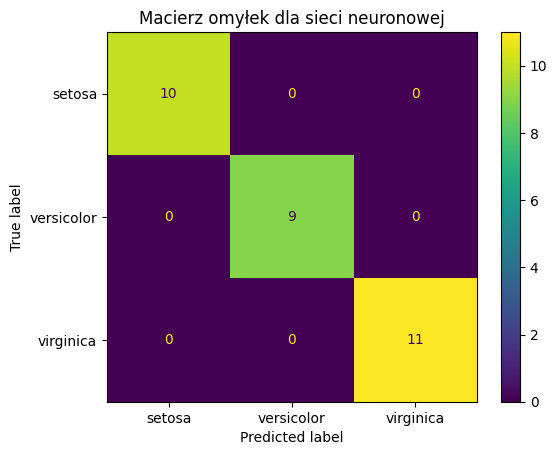

In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_preds)
cm_ann_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris_data['target_names'])
cm_ann_display.plot()
plt.title("Macierz omyłek dla sieci neuronowej")
plt.show()

Widzimy, że nasza zbudowana od zera "sieć" była bezbłędna!